In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

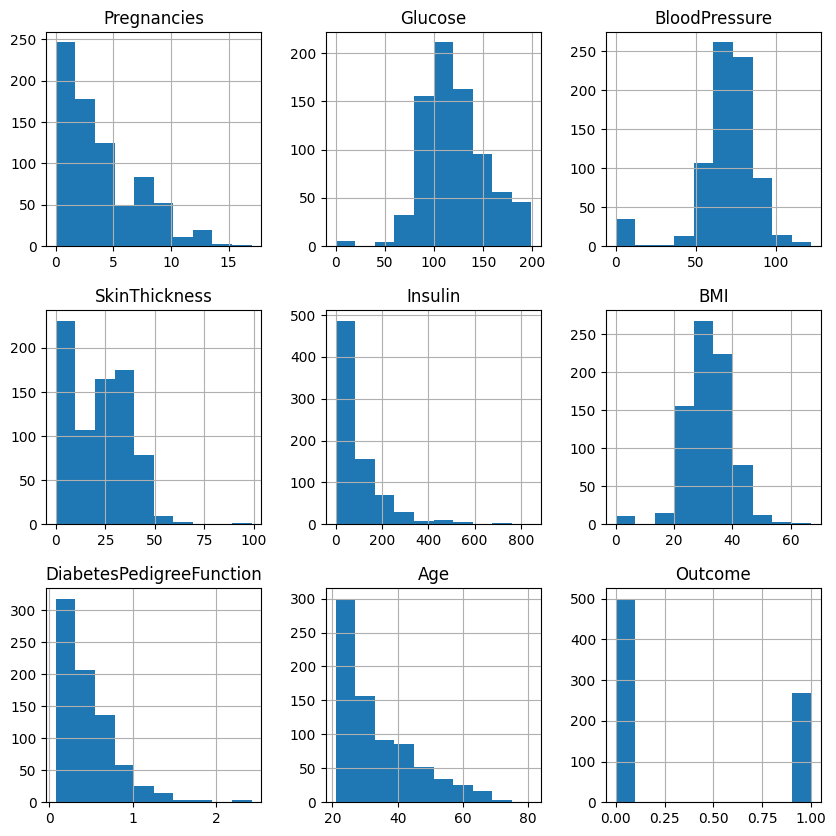

In [161]:
#Measuring wall clock time
start_time2 = time.process_time()

#Reading the input dataset file using pandas
dataset=pd.read_csv(r'C:\Users\nikhi\Downloads\diabetes.csv')
dataset.hist(figsize=(10,10))
plt.show()

In [162]:
print(dataset.head())
print(len(dataset))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
768


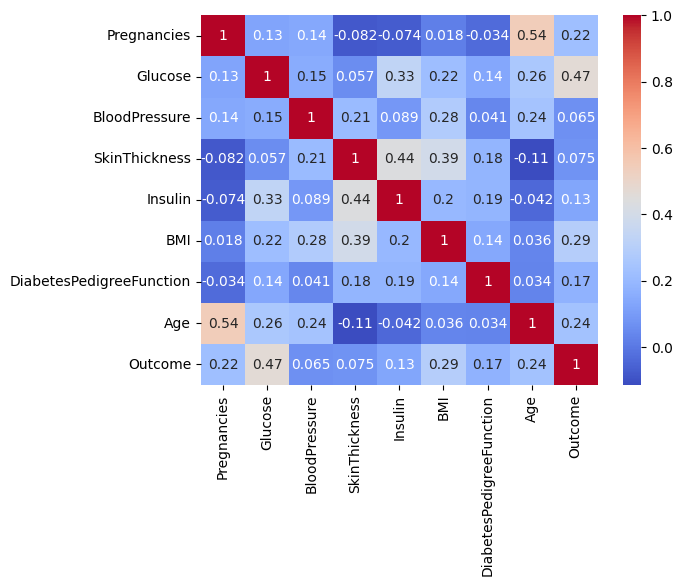

In [163]:
# Calculating the correlation matrix
corr_matrix = dataset.corr()

# Creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

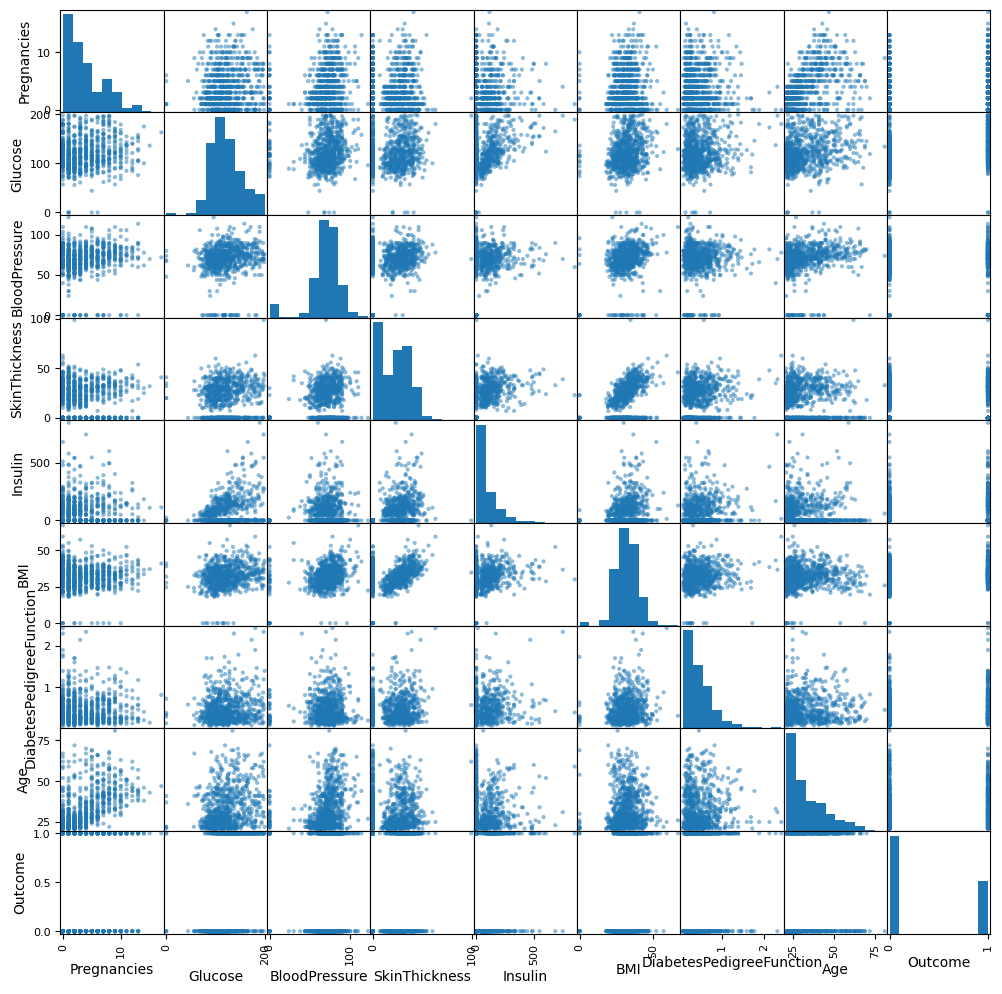

In [164]:
pd.plotting.scatter_matrix(dataset, figsize=(12,12))
plt.show()


In [165]:
#Data preprocessing by replacing zeroes with mean values
zeros_not_accepted=['Glucose','SkinThickness','BMI','Insulin','BloodPressure']
for column in zeros_not_accepted:
    dataset[column]=dataset[column].replace(0, np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN, mean)

In [166]:
#Scaling the data
scaled_data = (dataset - dataset.mean()) / dataset.std()

In [167]:
print(scaled_data['SkinThickness'])

0      0.670206
1     -0.012293
2     -0.012293
3     -0.694792
4      0.670206
         ...   
763    2.148954
764   -0.239793
765   -0.694792
766   -0.012293
767    0.215206
Name: SkinThickness, Length: 768, dtype: float64


In [168]:
# Shuffling the dataset randomly
scaled_data = scaled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Spliting the dataset into training and test sets (80-20 split)
train_size = int(0.8 * len(dataset))
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Separating the features and labels in the training and test sets
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
y_test_binary = np.where(y_test >= 0.5, 1, 0)

In [169]:
print(train_data)
print(test_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530 -0.778101      -1.189315       0.442706  0.408352  0.225310   
1      -0.547562 -0.318120       0.216034       0.328956 -0.003308  0.472570   
2      -0.547562 -0.449543      -0.693310      -0.012293 -0.003308 -0.240120   
3       1.233077 -0.482399       0.629371      -0.012293 -0.003308 -1.141890   
4       0.936304  0.470420       1.456047      -0.012293 -0.003308 -0.371022   
..           ...       ...            ...            ...       ...       ...   
609    -0.844335  0.109006      -0.197304      -0.581042 -0.532586 -1.185524   
610    -0.844335 -0.712390      -0.527975      -1.604791 -1.167719 -1.287337   
611    -0.547562 -0.975236      -1.685321      -0.012293 -0.003308 -0.341933   
612     0.936304 -0.252408      -0.693310      -0.012293 -0.003308 -0.734639   
613    -1.141108 -0.088129      -0.527975      -0.239793 -0.003308  0.923455   

     DiabetesPedigreeFunction       Age

In [170]:
print(train_data)
print(test_data)
print(y_test)
print(y_test_binary)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639530 -0.778101      -1.189315       0.442706  0.408352  0.225310   
1      -0.547562 -0.318120       0.216034       0.328956 -0.003308  0.472570   
2      -0.547562 -0.449543      -0.693310      -0.012293 -0.003308 -0.240120   
3       1.233077 -0.482399       0.629371      -0.012293 -0.003308 -1.141890   
4       0.936304  0.470420       1.456047      -0.012293 -0.003308 -0.371022   
..           ...       ...            ...            ...       ...       ...   
609    -0.844335  0.109006      -0.197304      -0.581042 -0.532586 -1.185524   
610    -0.844335 -0.712390      -0.527975      -1.604791 -1.167719 -1.287337   
611    -0.547562 -0.975236      -1.685321      -0.012293 -0.003308 -0.341933   
612     0.936304 -0.252408      -0.693310      -0.012293 -0.003308 -0.734639   
613    -1.141108 -0.088129      -0.527975      -0.239793 -0.003308  0.923455   

     DiabetesPedigreeFunction       Age

In [171]:
#Funciton to measure euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


In [172]:
#Funciton to measure manhattan distance
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [173]:
#Funciton to measure cosine distance
def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

In [174]:
#Funciton to measure minkowski distance
def minkowski_distance(x1, x2, p):
    return np.sum(np.abs(x1 - x2) ** p) ** (1/p)

In [175]:
#Funciton to KNN
def knn(X_train, y_train, X_test, k):

    n_test = X_test.shape[0]
    
    # Initializing the predictions array
    predictions = np.zeros(n_test)
    
    for i in range(n_test):
        # Calculate the distances between the current test sample and all training samples
        distances = np.array([minkowski_distance(X_test[i], X_train[j], 3) for j in range(X_train.shape[0])])
        # Find the indices of the k nearest neighbors
        k_nearest = np.argsort(distances)[:k]
        
        # Find the majority class among the k nearest neighbors
        classes = y_train[k_nearest].astype(int)
        count = np.bincount(classes)
        prediction = np.argmax(count)
        
        # Save the prediction for the current test sample
        predictions[i] = prediction
    
    return predictions



In [176]:
print(predictions)
y_test_binary

[0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0
 0 1 0 1 0 0]


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [177]:
def compute_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

# giving value for k
k = 11

# Making predictions using k-NN
predictions = knn(X_train, y_train, X_test, k)
predictions = predictions.astype(int)

# Compute the confusion matrix
tp, tn, fp, fn = compute_confusion_matrix(y_test_binary, predictions)

# Computing accuracy, precision and recall for knn alogorithm
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Display the confusion matrix
print("Confusion matrix:")
print("               Actual")
print("              0       1")
print("Predicted 0  ", tp, "   ", fp)
print("          1  ", fn, "   ", tn)


Accuracy: 0.7272727272727273
Precision: 0.6818181818181818
Recall: 0.5172413793103449
Confusion matrix:
               Actual
              0       1
Predicted 0   30     14
          1   28     82


In [178]:
import time

# Record start time
start_time = time.time()

# Run your algorithm
k = 11
predictions = knn(X_train, y_train, X_test, k)

# Record end time
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time

print("Elapsed time:", elapsed_time, "seconds")


Elapsed time: 0.48822546005249023 seconds


In [179]:

k = 11
predictions = knn(X_train, y_train, X_test, k)
predictions = predictions.astype(int)
accuracy = np.sum(predictions == y_test_binary) / len(y_test_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [182]:
end_time2 = time.process_time()
wall_clock_time = end_time2 - start_time2
print("Wall clock time:", runtime, "seconds")

Wall clock time: 51.89965343475342 seconds


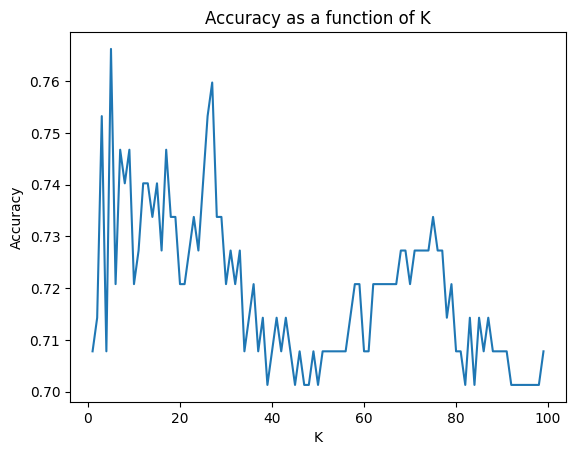

In [181]:
accuracies = []
for k in range(1, 100):
    # Predict the labels of the test set using the KNN algorithm
    predictions = knn(X_train, y_train, X_test, k)
    predictions = predictions.astype(int)
    
    # Calculate the accuracy of the classifier
    correct = 0
    for i in range(len(predictions)):
        if predictions[i] == y_test_binary[i]:
            correct += 1
    accuracy = correct / len(predictions)
    accuracies.append(accuracy)
    
# Plot the accuracy as a function of K
K_values = range(1, 100)
plt.plot(K_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of K')
plt.show()
